<a href="https://colab.research.google.com/github/jiukeem/deeplearning_from_scratch/blob/master/keras)_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

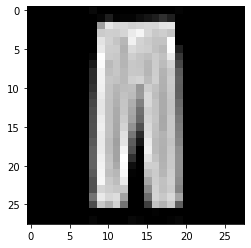

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train_all[21], cmap='gray')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all,test_size=0.2, random_state=42)

In [5]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1) # 예전처럼 펼칠 필요없음. 다만 컬러채널 디멘션을 추가해줬다
x_val = x_val.reshape(-1, 28, 28, 1)

In [7]:
x_train.shape

(48000, 28, 28, 1)

In [8]:
x_train = x_train / 255
x_val = x_val / 255

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [10]:
conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10, (3,3), activation='relu', padding='same', input_shape=(28, 28, 1))) 
# Conv2D는 커널의 개수, 커널의 크기(높이, 너비)를 받음. 첫 층이기 때문에 샘플개수를 뺀 input shape을 지정해줬다.
conv1.add(MaxPooling2D((2,2)))
# 튜플 형태로 매개변수(풀링 높이와 너비)를 받기 때문에 괄호가 두 개인 것에 유의
conv1.add(Flatten())
conv1.add(Dropout(0.5))
# 탈락시킬 뉴런의 비율 학습시키는 가중치가 없다는 말이 조금 헷갈리는데,
# 앤드류 응 수업에서처럼 한개의 fc레이어에 결합시키는게 아니라 일부 뉴런 출력을 0으로 만들고 나머지 뉴런의 출력을 드롭되지 않은 비율로 나누어 증가시키는 레이어라고 생각하면 될 듯
# flatten 도 앤드류 응 강의에서는 한개의 개별적인 레이어로 취급하지 않았었는데 여기서는 온전한 레이어인 것 처럼!
conv1.add(Dense(100, activation='relu'))
conv1.add(Dense(10, activation='softmax'))

conv1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1960)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1960)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               196100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
__________________________________________________

In [11]:
conv1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = conv1.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.5213 - accuracy: 0.8111 - val_loss: 0.3568 - val_accuracy: 0.8728
Epoch 2/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3804 - accuracy: 0.8608 - val_loss: 0.3142 - val_accuracy: 0.8855
Epoch 3/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3377 - accuracy: 0.8754 - val_loss: 0.2869 - val_accuracy: 0.8978
Epoch 4/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3070 - accuracy: 0.8872 - val_loss: 0.2643 - val_accuracy: 0.9042
Epoch 5/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2859 - accuracy: 0.8959 - val_loss: 0.2551 - val_accuracy: 0.9074
Epoch 6/20
1500/1500 [==============================] - 22s 14ms/step - loss: 0.2687 - accuracy: 0.8997 - val_loss: 0.2570 - val_accuracy: 0.9077
Epoch 7/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2566 - accuracy: 0.9049 - val_loss: 0.2371 -

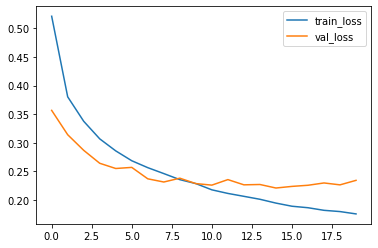

In [13]:


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [14]:
# 드롭아웃 없이는 같은 에포크 수에도 오버피팅이 된다
conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3,3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D((2,2)))
conv2.add(Flatten())
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))

conv2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               196100    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
_________________________________________________________________


In [15]:
conv2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = conv2.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.4396 - accuracy: 0.8461 - val_loss: 0.3165 - val_accuracy: 0.8867
Epoch 2/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2985 - accuracy: 0.8921 - val_loss: 0.2869 - val_accuracy: 0.8981
Epoch 3/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2564 - accuracy: 0.9070 - val_loss: 0.2763 - val_accuracy: 0.9020
Epoch 4/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2273 - accuracy: 0.9177 - val_loss: 0.2534 - val_accuracy: 0.9092
Epoch 5/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2043 - accuracy: 0.9251 - val_loss: 0.2616 - val_accuracy: 0.9092
Epoch 6/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1832 - accuracy: 0.9337 - val_loss: 0.2506 - val_accuracy: 0.9127
Epoch 7/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1642 - accuracy: 0.9398 - val_loss: 0.2635 -

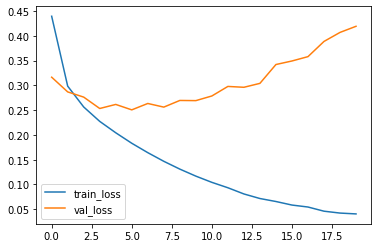

In [16]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['train_loss', 'val_loss'])
plt.show()